In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

### Quiz 2 Estadística II y Diseño de Experimentos

Se conduce un experimento con el fin de determinar la conservación en días de un **producto lácteo** empacado por tres tipos de trabajadores, 3 tipos de botellas y en tres formas de almacenamiento. Como variables de respuesta se presenta los días que el producto permanece en buenas condiciones. A continuación se muestran los datos obtenidos:

**1. Construya adecuadamente una arquitectura de datos que le permita analizar la información obtenida. La arquitectura debe presentarla en Excel y reportarla en el exámen**

In [4]:
# Cargamos los datos desde nuestra hoja de cálculo
df = pd.read_excel('quiz_3.xlsx', sheet_name=1) 
df.head(10)

,trabajador,tipo_botella,replica,tipo_almacenamiento,duracion
0,t1,plastico,R1,permanent,3.45
1,t1,plastico,R1,end_aisle,4.14
2,t1,plastico,R1,cooler,5.80
3,t1,plastico,R2,permanent,3.36
4,t1,plastico,R2,end_aisle,4.19
5,t1,plastico,R2,cooler,5.23
6,t1,vidrio-28,R1,permanent,4.07
7,t1,vidrio-28,R1,end_aisle,4.38
8,t1,vidrio-28,R1,cooler,5.48
9,t1,vidrio-28,R2,permanent,3.52


In [5]:
# Mostramos los estadisticos generales para las variables numéricas, en este caso la duración en dias
df.describe()

,duracion
count,54.000000
mean,4.697037
std,0.756194
min,3.360000
25%,4.175000
50%,4.525000
75%,5.147500
max,6.380000


**2. ¿Existen diferencias estadísticas entre los tipos de trabajadores? Plantee adecuadamente la pruebas de hipótesis y haga el cálculo manual y utilizando el software R con un 96.5% de confianza ¿Qué puede concluir respecto al valor P y al estadístico de prueba? Sugerencia: construya también el diagrama de cajas y bigotes**

### Solución

Significancia = 0.035 

Planteamiento de la hipotesis

$H_0 : \mu_{t1} = \mu_{t2} = \mu_{t3}$  
$H_a : $ Al menos una es diferentes

De acuerdo a los estadísticos obtenidos mas arriba las médias de duración de las muestras para cada trabajador son: 
  
$\mu_{t1} = 4.47$  
$\mu_{t2} = 5.23$  
$\mu_{t3} = 4.39$  
  
Como tenemos tres medias para comparar, debemos crear nuestra tabla Anova para determinar cual es diferente de los demás

In [6]:
# Agrupamos los datos por trabajador y tomamos los valores sólo de la columna de duración
g = df.groupby('trabajador')
duracion_t1 = g.get_group('t1')['duracion'].values
duracion_t2 = g.get_group('t2')['duracion'].values
duracion_t3 = g.get_group('t3')['duracion'].values

In [7]:
f, p = stats.f_oneway(duracion_t1,duracion_t2
                      ,duracion_t3)

In [8]:
print('Estadistico de prueba: {}'.format(f))
print('Valor de P: {}'.format(p))

Estadistico de prueba: 8.629705786668223
Valor de P: 0.0005914182430628186


Como el valor de p (0.000591) es menor que la significancia (0.035), al menos hay un trabajador diferente a los demás; para determinar cual es éste trabajador dirferente a los demás nos apoyamos en el diagrama de cajas y las pruebas de Tukey

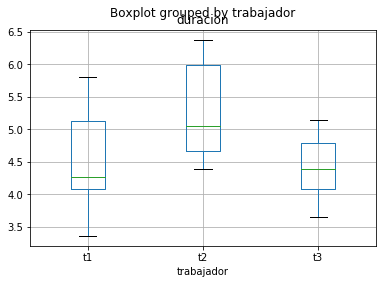

In [9]:
#Mostramos un diagrama de cajas para hacernos una idea general
df.boxplot('duracion', by = 'trabajador')

El diagrama de cajas me muestra que el tratamiento t2 difiere a los demás tratamientos, sin embargo para confirmar esto debemos realizar las pruebas de Tukey

In [10]:
# Creamos una comparación múltiple y realizamos el Tukey Test
mc = MultiComparison(df['duracion'], df['trabajador'])

print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  t1     t2    0.7561   0.2199  1.2923  True 
  t1     t3    -0.08   -0.6162  0.4562 False 
  t2     t3   -0.8361  -1.3723 -0.2999  True 
---------------------------------------------


La prueba de Tukey me dice que:  
* Rechace $H_0 : \mu_{t1} = \mu_{t2}$
* Rechace $H_0 : \mu_{t2} = \mu_{t3}$  
* Acepte $H_0 : \mu_{t1} = \mu_{t3}$  

Es decir t2 es diferente a las demás y t1 y t3 son tratamientos similares

Clusters formados:

* A: t1 y t3
* B: t2

Tabla Anova a mano:
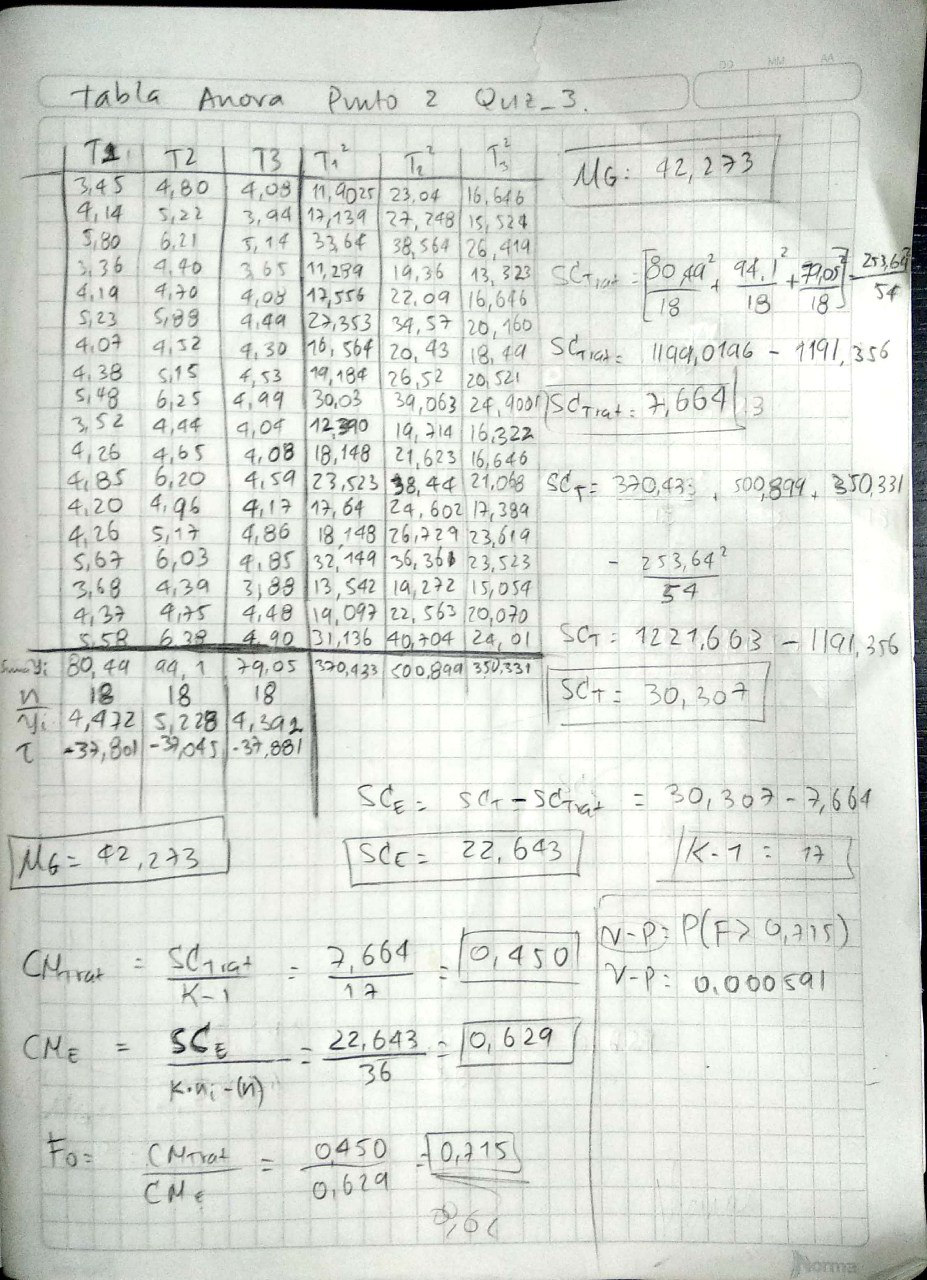

**3. ¿Es posible decir que existen diferencias estadísticas entre el tipo de conservación de las botellas (permanent, End Aisle y Cooler? Plantee adecuadamente las pruebas de hipótesis y concluya con un 97% de confianza utilizando el criterio del valorP. Muestre el procedimiento que hizo en R**

### Solución

Significancia = 0.03

Planteamiento de la hipotesis

$H_0 : \mu_{b1} = \mu_{b2} = \mu_{b3}$  
$H_a : $ Al menos una es diferentes

De acuerdo a los estadísticos obtenidos mas arriba las médias de duración de las muestras para cada botella son: 
  
$\mu_{a1} = 4.5978$  
$\mu_{a2} = 4.6833$  
$\mu_{a3} = 4.8100$  
  
 
Como tenemos tres medias para comparar, debemos crear nuestra tabla Anova para determinar cual es diferente de los demás

In [11]:
# Agrupamos los datos por tipos de almacenamiento y tomamos los valores sólo de la columna de duración
g = df.groupby('tipo_almacenamiento')
duracion_a1 = g.get_group('permanent')['duracion'].values
duracion_a2 = g.get_group('end_aisle')['duracion'].values
duracion_a3 = g.get_group('cooler')['duracion'].values

In [12]:
f_a, p_a = stats.f_oneway(duracion_a1, duracion_a2, duracion_a3)
f_a, p_a # Estadístico de prueba y valor de P para los tratamientos

(36.052943248321014, 1.7415244795596215e-10)

In [13]:
print('Estadistico de prueba: {}'.format(f_a))
print('Valor de P: {}'.format(p_a))

Estadistico de prueba: 36.052943248321014
Valor de P: 1.7415244795596215e-10


$H_0 : \mu_{t_a1} = \mu_{t_a2} = \mu_{t_a3}$ 

**CONCLUSION:** como el valor_P es menor que a la significancia (0.03), rechazo $ H_0 $ con lo cual hay al menos un tipo de almacenamiento diferente a los demás, lo que indica con un 97% de confianza que el tipo de almacenamiento tiene efectos significativos en la duración del producto lácteo.

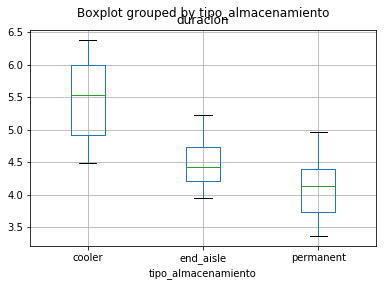

In [14]:
df.boxplot('duracion', by = 'tipo_almacenamiento')

**4. Para el caso de las réplicas, ¿Es posible establecer que las varianzas de estas réplicas son iguales o diferentes?, pruebe la hipótesis con un 90% de confianza y concluya apropiadamente**


Significancia = 0.1

Planteamiento de la hipotesis

$H_0 : σ_{t1}^2 = σ_{t2}^2$  
$H_a :  σ_{t1}^2 \ne σ_{t2}^2$

In [15]:
g = df.groupby('replica')
duracion_R1 = g.get_group('R1')['duracion'].values
duracion_R2 = g.get_group('R2')['duracion'].values

Estadístico de prueba

$F_0 = \frac{S_1^2}{S_2^2} $ 

In [16]:
f0 = duracion_R1.std()**2 / duracion_R2.std()**2
f0

0.9287558975085698

Críterio de rechazo

$F_0 > F_{\frac{α}{2}, n1-1, n2 -1}$

In [17]:
from scipy.stats import f
c_r = f.ppf(0.1/2 , len(duracion_R1)-1, len(duracion_R2)-1)
c_r

0.5183461693910738

In [18]:
f0 >  c_r #  ¿Rechazo H_0?

True

como $f_0 > C_r$ entonces rechazo H0, lo que quiere decir que las réplicas son diferentes 

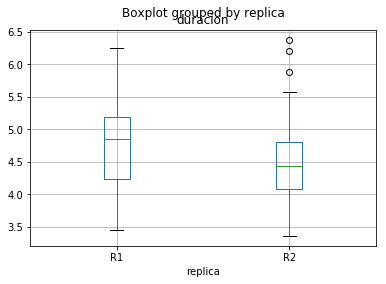

In [19]:
df.boxplot('duracion', by = 'replica')

** 5. ¿Cuál es el trabajador, el tipo de botella y el tipo de almacenamiento que maximiza el tiempo de conservación? Construya la tabla ANOVA y las respectivas gráficas de interacción. Interprete los resultados con un 95% de confianza. **

In [20]:
df[(df['trabajador'] == 't2') & (df['tipo_botella'] == 'vidrio-38') & (df['tipo_almacenamiento'] == 'cooler')]

,trabajador,tipo_botella,replica,tipo_almacenamiento,duracion
32,t2,vidrio-38,R1,cooler,6.03
35,t2,vidrio-38,R2,cooler,6.38


El trabajador: t2

El tipo de botella: vidrio-38

El tipo de almacenamiento: cooler